# CATS and DOGS Classification

*   ImageDataGenerator 사용
*   각 case 별 accuracy 측정



### Logistic Regression

accuracy: 0.5630

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from sklearn import utils
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [6]:
# 경로 설정
train_dir = '/content/drive/MyDrive/KCC 3기 Colab Home/data/cat_dog_small/train'
validation_dir = '/content/drive/MyDrive/KCC 3기 Colab Home/data/cat_dog_small/validation'
test_dir = '/content/drive/MyDrive/KCC 3기 Colab Home/data/cat_dog_small/test'

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes=['cats', 'dogs'],
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    classes=['cats', 'dogs'],
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    classes=['cats', 'dogs'],
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
# 모델 생성
ml_model = Sequential()

# layer 추가
ml_model.add(Flatten(input_shape=(150*150*3,)))
ml_model.add(Dense(1, activation='sigmoid'))

ml_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 1)                 67501     
                                                                 
Total params: 67,501
Trainable params: 67,501
Non-trainable params: 0
_________________________________________________________________


In [9]:
# model 설정
ml_model.compile(optimizer=Adam(learning_rate=1e-4),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

from keras.callbacks import EarlyStopping

earlystopping_callback = EarlyStopping(monitor='val_loss',
                                       patience=5,
                                       verbose=1,
                                       restore_best_weights=True)

# model 학습
ml_model_result = ml_model.fit(train_generator,
                               steps_per_epoch=100,
                               epochs=30,
                               verbose=1,
                               callbacks=[earlystopping_callback],
                               validation_data=validation_generator,
                               validation_steps=50)

Epoch 1/30
100/100 [==============================] - 506s 5s/step - loss: 0.7290 - accuracy: 0.5570 - val_loss: 0.7092 - val_accuracy: 0.5660
Epoch 2/30
100/100 [==============================] - 9s 88ms/step - loss: 0.6996 - accuracy: 0.5785 - val_loss: 0.7166 - val_accuracy: 0.5260
Epoch 3/30
100/100 [==============================] - 9s 95ms/step - loss: 0.6891 - accuracy: 0.6050 - val_loss: 0.7272 - val_accuracy: 0.5330
Epoch 4/30
100/100 [==============================] - 11s 108ms/step - loss: 0.6509 - accuracy: 0.6215 - val_loss: 0.7039 - val_accuracy: 0.5630
Epoch 5/30
100/100 [==============================] - 10s 102ms/step - loss: 0.6231 - accuracy: 0.6590 - val_loss: 0.7084 - val_accuracy: 0.5590
Epoch 6/30
100/100 [==============================] - 14s 138ms/step - loss: 0.7274 - accuracy: 0.6060 - val_loss: 0.7121 - val_accuracy: 0.5570
Epoch 7/30
100/100 [==============================] - 10s 101ms/step - loss: 0.6059 - accuracy: 0.6560 - val_loss: 0.8164 - val_accuracy

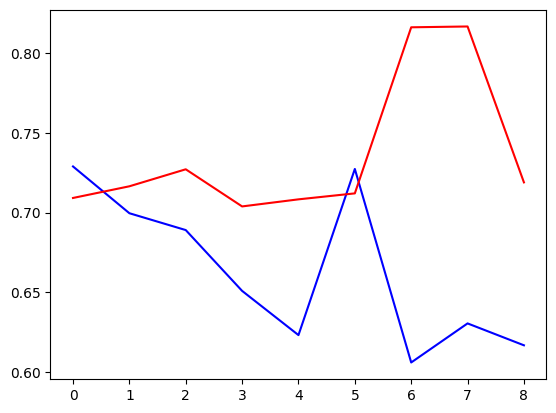

In [39]:
plt.plot(ml_model_result.history['loss'], color='b')
plt.plot(ml_model_result.history['val_loss'], color='r')
plt.show()

In [10]:
ml_model.evaluate(test_generator)

50/50 [==============================] - 337s 7s/step - loss: 0.6811 - accuracy: 0.5630


[0.6810925006866455, 0.5630000233650208]

### DNN

accuracy: 0.6050

In [11]:
# 모델 생성
dnn_model = Sequential()

# layer 추가
dnn_model.add(Flatten(input_shape=(150*150*3,)))

# hidden layer 추가
dnn_model.add(Dense(256, activation='relu'))
dnn_model.add(Dense(128, activation='relu'))

dnn_model.add(Dense(1, activation='sigmoid'))

dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 67500)             0         
                                                                 
 dense_1 (Dense)             (None, 256)               17280256  
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,313,281
Trainable params: 17,313,281
Non-trainable params: 0
_________________________________________________________________


In [12]:
# model 설정
dnn_model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

from keras.callbacks import EarlyStopping

earlystopping_callback = EarlyStopping(monitor='val_loss',
                                       patience=5,
                                       verbose=1,
                                       restore_best_weights=True)

# model 학습
dnn_model_result = dnn_model.fit(train_generator,
                                 steps_per_epoch=100,
                                 epochs=30,
                                 verbose=1,
                                 callbacks=[earlystopping_callback],
                                 validation_data=validation_generator,
                                 validation_steps=50)

Epoch 1/30
100/100 [==============================] - 10s 89ms/step - loss: 0.8283 - accuracy: 0.5250 - val_loss: 1.0077 - val_accuracy: 0.4950
Epoch 2/30
100/100 [==============================] - 9s 91ms/step - loss: 0.7127 - accuracy: 0.5655 - val_loss: 0.8148 - val_accuracy: 0.5090
Epoch 3/30
100/100 [==============================] - 11s 111ms/step - loss: 0.7109 - accuracy: 0.5685 - val_loss: 0.7223 - val_accuracy: 0.5350
Epoch 4/30
100/100 [==============================] - 11s 113ms/step - loss: 0.6616 - accuracy: 0.6220 - val_loss: 0.7276 - val_accuracy: 0.5350
Epoch 5/30
100/100 [==============================] - 14s 136ms/step - loss: 0.6437 - accuracy: 0.6380 - val_loss: 0.6875 - val_accuracy: 0.5860
Epoch 6/30
100/100 [==============================] - 9s 92ms/step - loss: 0.7092 - accuracy: 0.6030 - val_loss: 0.7808 - val_accuracy: 0.5240
Epoch 7/30
100/100 [==============================] - 11s 110ms/step - loss: 0.6539 - accuracy: 0.6195 - val_loss: 0.7012 - val_accurac

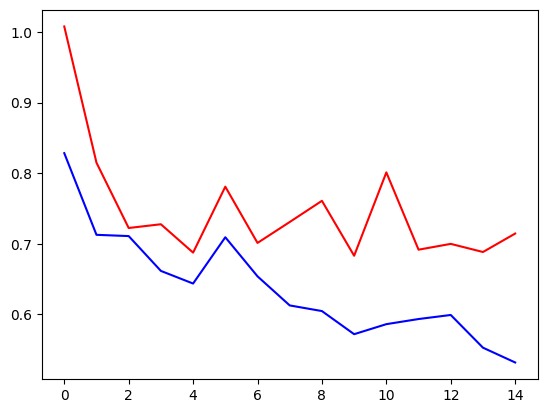

In [40]:
plt.plot(dnn_model_result.history['loss'], color='b')
plt.plot(dnn_model_result.history['val_loss'], color='r')
plt.show()

In [13]:
dnn_model.evaluate(test_generator)

50/50 [==============================] - 3s 56ms/step - loss: 0.6692 - accuracy: 0.6050


[0.6691692471504211, 0.6050000190734863]

### CNN (No Augmentation)

accuracy: 0.7390

In [14]:
from keras.layers import Conv2D, MaxPool2D, Dropout

cnn_model = Sequential()

# Feature Extraction (Convolution, Pooling)
cnn_model.add(Conv2D(filters=32,
                      kernel_size=(3,3),
                      activation='relu',
                      padding='same',
                      input_shape=(150,150,3)))

cnn_model.add(MaxPool2D(pool_size=(2,2)))

cnn_model.add(Conv2D(filters=64,
                      kernel_size=(3,3),
                      activation='relu',
                      padding='same'))

cnn_model.add(MaxPool2D(pool_size=(2,2)))

cnn_model.add(Conv2D(filters=128,
                      kernel_size=(3,3),
                      activation='relu',
                      padding='same'))

cnn_model.add(Conv2D(filters=128,
                      kernel_size=(3,3),
                      activation='relu',
                      padding='same'))

cnn_model.add(MaxPool2D(pool_size=(2,2)))

cnn_model.add(Conv2D(filters=256,
                      kernel_size=(3,3),
                      activation='relu',
                      padding='same'))

cnn_model.add(Conv2D(filters=256,
                      kernel_size=(3,3),
                      activation='relu',
                      padding='same'))

cnn_model.add(MaxPool2D(pool_size=(2,2)))

# FC layer
cnn_model.add(Flatten()) # input 역할

# Dropout
cnn_model.add(Dropout(0.5))

# Hidden layer
cnn_model.add(Dense(256, activation='relu'))

# Output layer
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 128)      

In [15]:
# model 설정
cnn_model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

from keras.callbacks import EarlyStopping

earlystopping_callback = EarlyStopping(monitor='val_loss',
                                       patience=5,
                                       verbose=1,
                                       restore_best_weights=True)

# model 학습
cnn_model_result = cnn_model.fit(train_generator,
                                 steps_per_epoch=100,
                                 epochs=30,
                                 verbose=1,
                                 callbacks=[earlystopping_callback],
                                 validation_data=validation_generator,
                                 validation_steps=50)

Epoch 1/30
100/100 [==============================] - 16s 96ms/step - loss: 0.6920 - accuracy: 0.5220 - val_loss: 0.6847 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 9s 94ms/step - loss: 0.6893 - accuracy: 0.5595 - val_loss: 0.6814 - val_accuracy: 0.5680
Epoch 3/30
100/100 [==============================] - 10s 105ms/step - loss: 0.6438 - accuracy: 0.6485 - val_loss: 0.6536 - val_accuracy: 0.6440
Epoch 4/30
100/100 [==============================] - 10s 97ms/step - loss: 0.6098 - accuracy: 0.6765 - val_loss: 0.6509 - val_accuracy: 0.6550
Epoch 5/30
100/100 [==============================] - 11s 114ms/step - loss: 0.5533 - accuracy: 0.7210 - val_loss: 0.6362 - val_accuracy: 0.6720
Epoch 6/30
100/100 [==============================] - 10s 102ms/step - loss: 0.5318 - accuracy: 0.7365 - val_loss: 0.5642 - val_accuracy: 0.7080
Epoch 7/30
100/100 [==============================] - 13s 134ms/step - loss: 0.5074 - accuracy: 0.7510 - val_loss: 0.5633 - val_accura

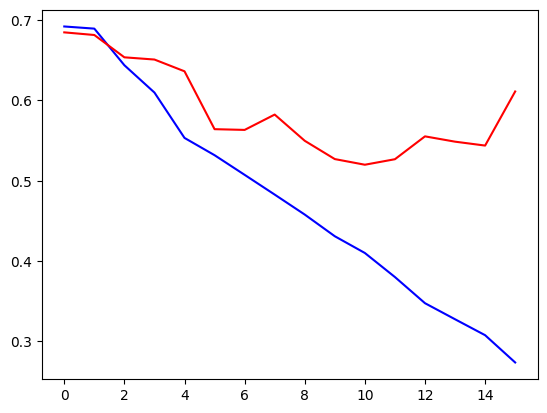

In [41]:
plt.plot(cnn_model_result.history['loss'], color='b')
plt.plot(cnn_model_result.history['val_loss'], color='r')
plt.show()

In [16]:
cnn_model.evaluate(test_generator)

50/50 [==============================] - 3s 59ms/step - loss: 0.5201 - accuracy: 0.7390


[0.520126223564148, 0.7390000224113464]

### CNN (Augmentation)

accuracy: 0.7690

In [17]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Validation data에 대해서는 당연히 증식을 사용하면 안된다.
validation_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    classes=['cats', 'dogs'],
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              classes=['cats', 'dogs'],
                                                              target_size=(150, 150),
                                                              batch_size=20,
                                                              class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  classes=['cats', 'dogs'],
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
from keras.layers import Conv2D, MaxPool2D, Dropout

cnn_aug_model = Sequential()

# Feature Extraction (Convolution, Pooling)
cnn_aug_model.add(Conv2D(filters=32,
                          kernel_size=(3,3),
                          activation='relu',
                          padding='same',
                          input_shape=(150,150,3)))

cnn_aug_model.add(MaxPool2D(pool_size=(2,2)))

cnn_aug_model.add(Conv2D(filters=64,
                          kernel_size=(3,3),
                          activation='relu',
                          padding='same'))

cnn_aug_model.add(MaxPool2D(pool_size=(2,2)))

cnn_aug_model.add(Conv2D(filters=128,
                          kernel_size=(3,3),
                          activation='relu',
                          padding='same'))

cnn_aug_model.add(Conv2D(filters=128,
                          kernel_size=(3,3),
                          activation='relu',
                          padding='same'))

cnn_aug_model.add(MaxPool2D(pool_size=(2,2)))

cnn_aug_model.add(Conv2D(filters=256,
                          kernel_size=(3,3),
                          activation='relu',
                          padding='same'))

cnn_aug_model.add(Conv2D(filters=256,
                          kernel_size=(3,3),
                          activation='relu',
                          padding='same'))

cnn_aug_model.add(MaxPool2D(pool_size=(2,2)))

# FC layer
cnn_aug_model.add(Flatten()) # input 역할

# Dropout
cnn_aug_model.add(Dropout(0.5))

# Hidden layer
cnn_aug_model.add(Dense(256, activation='relu'))

# Output layer
cnn_aug_model.add(Dense(1, activation='sigmoid'))

cnn_aug_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 37, 37, 128)      

In [19]:
# model 설정
cnn_aug_model.compile(optimizer=Adam(learning_rate=1e-4),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

from keras.callbacks import EarlyStopping

earlystopping_callback = EarlyStopping(monitor='val_loss',
                                       patience=5,
                                       verbose=1,
                                       restore_best_weights=True)

# model 학습
cnn_aug_model_result = cnn_aug_model.fit(train_generator,
                                          steps_per_epoch=100,
                                          epochs=30,
                                          verbose=1,
                                          callbacks=[earlystopping_callback],
                                          validation_data=validation_generator,
                                          validation_steps=50)

Epoch 1/30
100/100 [==============================] - 21s 203ms/step - loss: 0.6941 - accuracy: 0.5080 - val_loss: 0.6917 - val_accuracy: 0.5040
Epoch 2/30
100/100 [==============================] - 26s 260ms/step - loss: 0.6927 - accuracy: 0.5220 - val_loss: 0.6895 - val_accuracy: 0.5670
Epoch 3/30
100/100 [==============================] - 22s 222ms/step - loss: 0.6857 - accuracy: 0.5600 - val_loss: 0.6863 - val_accuracy: 0.5520
Epoch 4/30
100/100 [==============================] - 22s 216ms/step - loss: 0.6671 - accuracy: 0.5950 - val_loss: 0.6488 - val_accuracy: 0.6380
Epoch 5/30
100/100 [==============================] - 21s 211ms/step - loss: 0.6333 - accuracy: 0.6395 - val_loss: 0.5950 - val_accuracy: 0.6830
Epoch 6/30
100/100 [==============================] - 25s 252ms/step - loss: 0.5863 - accuracy: 0.6865 - val_loss: 0.5729 - val_accuracy: 0.6790
Epoch 7/30
100/100 [==============================] - 20s 201ms/step - loss: 0.5597 - accuracy: 0.7195 - val_loss: 0.5842 - val_ac

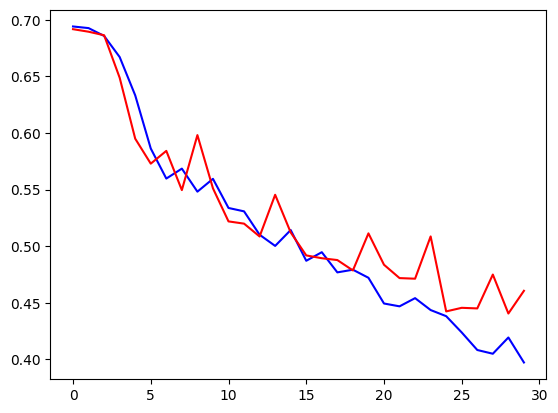

In [42]:
plt.plot(cnn_aug_model_result.history['loss'], color='b')
plt.plot(cnn_aug_model_result.history['val_loss'], color='r')
plt.show()

In [20]:
cnn_aug_model.evaluate(test_generator)

50/50 [==============================] - 3s 58ms/step - loss: 0.4809 - accuracy: 0.7690


[0.48087644577026367, 0.7689999938011169]

### Transfer Learning (VGG16) - No Fine Tuning (Augmentation)

accuracy: 0.8980

In [21]:
from keras.applications import VGG16

# model 생성

model_base = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(150,150,3))

model_base.trainable = False # 필터 값 update 안함

tl_vgg16_model = Sequential()

tl_vgg16_model.add(model_base)

# classifier의 input layer
tl_vgg16_model.add(Flatten(input_shape=(4*4*512,)))

tl_vgg16_model.add(Dense(256,
                   activation='relu'))

tl_vgg16_model.add(Dropout(0.5))

tl_vgg16_model.add(Dense(1, activation='sigmoid'))


tl_vgg16_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
___________________________________

In [22]:
# model 설정
tl_vgg16_model.compile(optimizer=Adam(learning_rate=1e-4),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

earlystopping_callback = EarlyStopping(monitor='val_loss',
                                       patience=5,
                                       verbose=1,
                                       restore_best_weights=True)

# model 학습
tl_vgg16_model_result = tl_vgg16_model.fit(train_generator,
                                           steps_per_epoch=100,
                                           epochs=30,
                                           verbose=1,
                                           callbacks=[earlystopping_callback],
                                           validation_data=validation_generator,
                                           validation_steps=50)

Epoch 1/30
100/100 [==============================] - 24s 217ms/step - loss: 0.5266 - accuracy: 0.7235 - val_loss: 0.3529 - val_accuracy: 0.8480
Epoch 2/30
100/100 [==============================] - 21s 207ms/step - loss: 0.4067 - accuracy: 0.8145 - val_loss: 0.2906 - val_accuracy: 0.8800
Epoch 3/30
100/100 [==============================] - 21s 211ms/step - loss: 0.3744 - accuracy: 0.8275 - val_loss: 0.2833 - val_accuracy: 0.8870
Epoch 4/30
100/100 [==============================] - 24s 245ms/step - loss: 0.3424 - accuracy: 0.8460 - val_loss: 0.2679 - val_accuracy: 0.8940
Epoch 5/30
100/100 [==============================] - 23s 232ms/step - loss: 0.3217 - accuracy: 0.8645 - val_loss: 0.2534 - val_accuracy: 0.8980
Epoch 6/30
100/100 [==============================] - 22s 221ms/step - loss: 0.3225 - accuracy: 0.8570 - val_loss: 0.2519 - val_accuracy: 0.9020
Epoch 7/30
100/100 [==============================] - 22s 215ms/step - loss: 0.3157 - accuracy: 0.8600 - val_loss: 0.2522 - val_ac

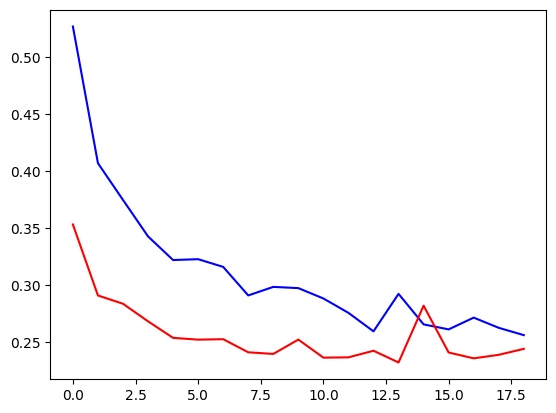

In [43]:
plt.plot(tl_vgg16_model_result.history['loss'], color='b')
plt.plot(tl_vgg16_model_result.history['val_loss'], color='r')
plt.show()

In [23]:
tl_vgg16_model.evaluate(test_generator)

50/50 [==============================] - 3s 63ms/step - loss: 0.2482 - accuracy: 0.8980


[0.24815429747104645, 0.8980000019073486]

### Transfer Learning (VGG16) - Fine Tuning (Augmentation)

accuracy: 0.9390

In [24]:
from keras.applications import VGG16

# model 생성

model_base = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(150,150,3))

model_base.trainable = True

for layer in model_base.layers:
    if layer.name in ['block5_conv1','block5_conv2','block5_conv3']:
        layer.trainable = True
    else:
        layer.trainable = False

tl_vgg16_ft_model = Sequential()

tl_vgg16_ft_model.add(model_base)

# classifier의 input layer
tl_vgg16_ft_model.add(Flatten(input_shape=(4*4*512,)))

tl_vgg16_ft_model.add(Dense(256,
                      activation='relu'))

tl_vgg16_ft_model.add(Dropout(0.5))

tl_vgg16_ft_model.add(Dense(1, activation='sigmoid'))


tl_vgg16_ft_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               2097408   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [25]:
# model 설정
tl_vgg16_ft_model.compile(optimizer=Adam(learning_rate=1e-4),
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

earlystopping_callback = EarlyStopping(monitor='val_loss',
                                       patience=5,
                                       verbose=1,
                                       restore_best_weights=True)

# model 학습
tl_vgg16_ft_model_result = tl_vgg16_ft_model.fit(train_generator,
                                                 steps_per_epoch=100,
                                                 epochs=30,
                                                 verbose=1,
                                                 callbacks=[earlystopping_callback],
                                                 validation_data=validation_generator,
                                                 validation_steps=50)

Epoch 1/30
100/100 [==============================] - 23s 219ms/step - loss: 0.4706 - accuracy: 0.7705 - val_loss: 0.1984 - val_accuracy: 0.9120
Epoch 2/30
100/100 [==============================] - 21s 213ms/step - loss: 0.2636 - accuracy: 0.8835 - val_loss: 0.1746 - val_accuracy: 0.9230
Epoch 3/30
100/100 [==============================] - 23s 226ms/step - loss: 0.2181 - accuracy: 0.9090 - val_loss: 0.1923 - val_accuracy: 0.9220
Epoch 4/30
100/100 [==============================] - 24s 245ms/step - loss: 0.1894 - accuracy: 0.9250 - val_loss: 0.2853 - val_accuracy: 0.8870
Epoch 5/30
100/100 [==============================] - 28s 279ms/step - loss: 0.1818 - accuracy: 0.9315 - val_loss: 0.1655 - val_accuracy: 0.9320
Epoch 6/30
100/100 [==============================] - 22s 222ms/step - loss: 0.1627 - accuracy: 0.9295 - val_loss: 0.1597 - val_accuracy: 0.9320
Epoch 7/30
100/100 [==============================] - 22s 224ms/step - loss: 0.1560 - accuracy: 0.9305 - val_loss: 0.1522 - val_ac

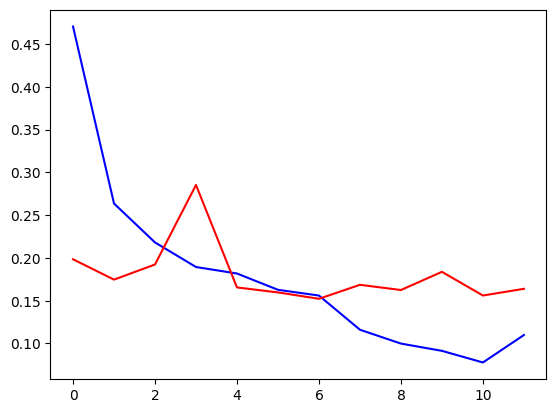

In [44]:
plt.plot(tl_vgg16_ft_model_result.history['loss'], color='b')
plt.plot(tl_vgg16_ft_model_result.history['val_loss'], color='r')
plt.show()

In [26]:
tl_vgg16_ft_model.evaluate(test_generator)

50/50 [==============================] - 3s 63ms/step - loss: 0.1561 - accuracy: 0.9390


[0.1560843139886856, 0.9390000104904175]

### Transfer Learning (EfficientNet) - Fine Tuning (Augmentation)

accuracy: 0.9800

In [35]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Validation data에 대해서는 당연히 증식을 사용하면 안된다.
validation_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    classes=['cats', 'dogs'],
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              classes=['cats', 'dogs'],
                                                              target_size=(150, 150),
                                                              batch_size=20,
                                                              class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  classes=['cats', 'dogs'],
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [36]:
from keras.applications import EfficientNetB0

model_base = EfficientNetB0(weights='imagenet',
                            include_top=False,
                            input_shape=(150,150,3))

model_base.trainable = True

for layer in model_base.layers:
    if layer.name in ['top_conv']:
        layer.trainable = True
        print('**')
    else:
        layer.trainable = False

efficientNet_ft_model = Sequential()

efficientNet_ft_model.add(model_base)

# classifier의 input layer
efficientNet_ft_model.add(Flatten(input_shape=(5*5*1280,))) # 5, 5, 1280

efficientNet_ft_model.add(Dense(256, activation='relu'))

efficientNet_ft_model.add(Dropout(0.5))

efficientNet_ft_model.add(Dense(1, activation='sigmoid'))


efficientNet_ft_model.summary()

**
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 5, 5, 1280)       4049571   
                                                                 
 flatten_10 (Flatten)        (None, 32000)             0         
                                                                 
 dense_20 (Dense)            (None, 256)               8192256   
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 1)                 257       
                                                                 
Total params: 12,242,084
Trainable params: 8,602,113
Non-trainable params: 3,639,971
_________________________________________________________________


In [37]:
# model 설정
efficientNet_ft_model.compile(optimizer=Adam(learning_rate=1e-4),
                              loss='binary_crossentropy',
                              metrics=['accuracy'])

earlystopping_callback = EarlyStopping(monitor='val_loss',
                                       patience=5,
                                       verbose=1,
                                       restore_best_weights=True)

# model 학습
efficientNet_ft_model_result = efficientNet_ft_model.fit(train_generator,
                                                         steps_per_epoch=100,
                                                         epochs=30,
                                                         verbose=1,
                                                         callbacks=[earlystopping_callback],
                                                         validation_data=validation_generator,
                                                         validation_steps=50)

Epoch 1/30
100/100 [==============================] - 28s 219ms/step - loss: 0.1787 - accuracy: 0.9370 - val_loss: 0.0622 - val_accuracy: 0.9770
Epoch 2/30
100/100 [==============================] - 20s 196ms/step - loss: 0.0913 - accuracy: 0.9635 - val_loss: 0.0726 - val_accuracy: 0.9710
Epoch 3/30
100/100 [==============================] - 19s 193ms/step - loss: 0.0958 - accuracy: 0.9685 - val_loss: 0.0562 - val_accuracy: 0.9830
Epoch 4/30
100/100 [==============================] - 21s 210ms/step - loss: 0.0782 - accuracy: 0.9720 - val_loss: 0.0854 - val_accuracy: 0.9760
Epoch 5/30
100/100 [==============================] - 20s 201ms/step - loss: 0.0672 - accuracy: 0.9755 - val_loss: 0.0681 - val_accuracy: 0.9820
Epoch 6/30
100/100 [==============================] - 21s 213ms/step - loss: 0.0608 - accuracy: 0.9795 - val_loss: 0.0665 - val_accuracy: 0.9810
Epoch 7/30
100/100 [==============================] - 20s 196ms/step - loss: 0.0352 - accuracy: 0.9855 - val_loss: 0.0678 - val_ac

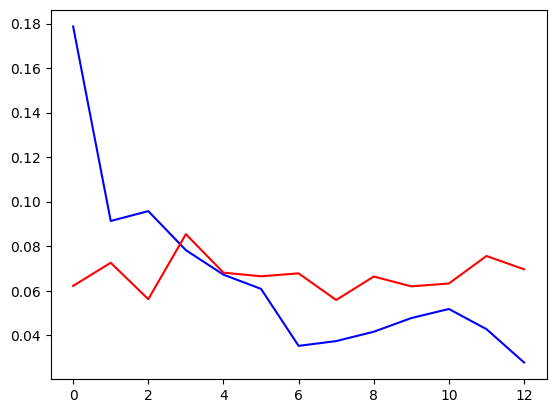

In [45]:
plt.plot(efficientNet_ft_model_result.history['loss'], color='b')
plt.plot(efficientNet_ft_model_result.history['val_loss'], color='r')
plt.show()

In [38]:
efficientNet_ft_model.evaluate(test_generator)

50/50 [==============================] - 3s 60ms/step - loss: 0.0516 - accuracy: 0.9800


[0.051648132503032684, 0.9800000190734863]